# _Exploratory Data Analysis of the Coimbra Breast Cancer data Data Set._

## Dataset Summary.

The dataset used in this project consists of anthropometric data and parameters gathered in a standard blood analysis. This dataset was created by Miguel Patrício, José Pereira, Joana Crisóstomo, Paulo Matafome, Raquel Seiça, Francisco Caramelo, all from the Faculty of Medicine of the University of Coimbra and also Manuel Gomes from the University Hospital Centre of Coimbra (Patrício et al., 2018). The dataset was sourced from the UCI Machine Learning Repository (Dua and Graff 2017) and it can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra), particularly [this file](https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv). Each row in this dataset represents a set of observations of individual patients and each column represents a variable. In this dataset, there are 116 observations and 9 features which are all numerical. There are zero observations with missing values for each class in the dataset. The target column is a binary dependent variable, which indicates the presence (Classification = 2) or absence (Classification = 1) of breast cancer.


### Exploratory Data Analysis checklist:

- Formulate the question
- Read in the data
- Check the packaging
- Look at the top and the bottom of your data
- Make a plot
- Follow up

### Formulate the Question: 

Given the anthropometric parameters available, does a patient have breast cancer or not?

## Load Required Packages

In [1]:
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Read in the data and Check the packaging

In [2]:
bc_df = pd.read_csv("../data/raw/dataR2.csv")

bc_df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


### The Workflow to which we should adhere.

To avoid breaking the golden rule and hence optaining an optimistic estimate of our model's performance when computing scores (which is bad), we have decided to split our dataset before performing an exploratory data analysis.

In [3]:
train_df, test_df = train_test_split(bc_df, test_size = 0.3, random_state = 111)

In [4]:
train_df["Classification"].value_counts(normalize=True)

2    0.567901
1    0.432099
Name: Classification, dtype: float64

The class distribution is fairly balanced, therefore we do not need to worry about a class imbalance. 

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 94 to 84
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             81 non-null     int64  
 1   BMI             81 non-null     float64
 2   Glucose         81 non-null     int64  
 3   Insulin         81 non-null     float64
 4   HOMA            81 non-null     float64
 5   Leptin          81 non-null     float64
 6   Adiponectin     81 non-null     float64
 7   Resistin        81 non-null     float64
 8   MCP.1           81 non-null     float64
 9   Classification  81 non-null     int64  
dtypes: float64(7), int64(3)
memory usage: 7.0 KB


In [6]:
train_df.describe(include = "all")

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,56.716049,27.484590,100.888889,11.592642,3.228910,27.571460,9.699994,14.767862,528.879457,1.567901
std,16.612672,5.020722,24.901807,11.358037,4.192692,20.296397,6.168656,13.242587,346.611009,0.498454
min,24.000000,18.370000,74.000000,2.432000,0.563880,4.311000,2.194280,3.210000,45.843000,1.000000
25%,45.000000,23.000000,87.000000,4.690000,1.013839,12.261700,5.429285,6.850000,280.694000,1.000000
50%,54.000000,27.300000,93.000000,6.760000,1.658774,20.092000,8.010000,10.576350,448.799000,2.000000
75%,69.000000,31.250000,103.000000,12.548000,3.262364,37.843000,11.787960,16.485080,667.928000,2.000000
max,89.000000,37.035608,201.000000,58.460000,25.050342,90.280000,36.060000,82.100000,1698.440000,2.000000


## Make Plots:

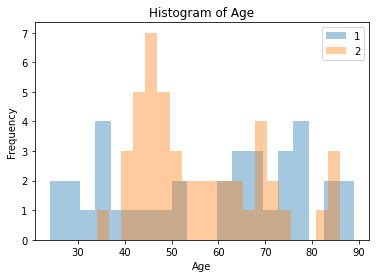

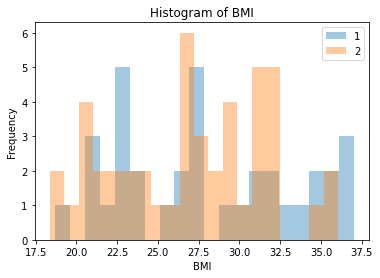

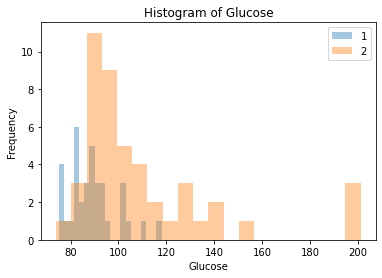

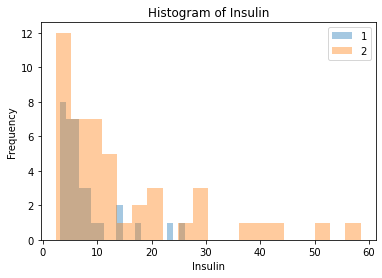

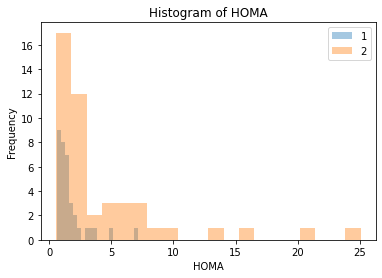

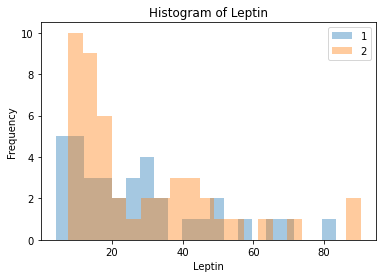

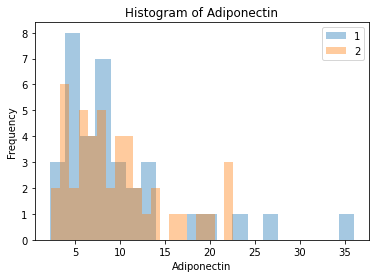

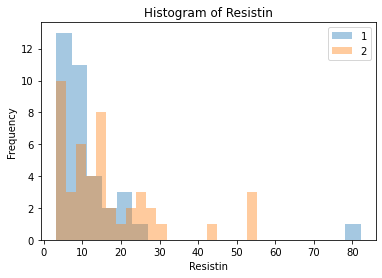

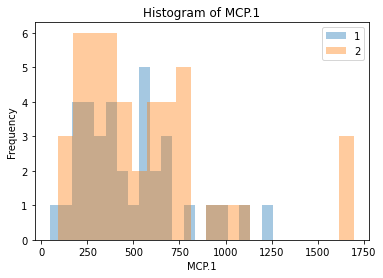

In [7]:
features = train_df.drop(columns = ["Classification"]).select_dtypes(include = np.number)

for feat in features:
    ax = train_df.groupby("Classification")[feat].plot.hist(bins = 20, alpha = 0.4, legend = True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

## Follow up:

Looking at the graphs developed above, there seems to be some interesting features which we can use to predict the presence or absence of breast cancer. Therefore, we plan on exploring classification evaluation metrics, developing a baseline model, exploring more complicated models, choosing a model based on our evaluation metrics, and performing hyperparameter optimization of the model.  

# _References_

Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R. and Caramelo, F., 2018. Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1). https://doi.org/10.1186/s12885-017-3877-1

Dua, Dheeru, and Casey Graff. 2017. “UCI Machine Learning Repository.” University of California, Irvine, School of Information; Computer Sciences. http://archive.ics.uci.edu/ml.